# Testing SAM

In [4]:
import torch
import torchvision
import cv2
import sys
import numpy as np
import h5py
from matplotlib import pyplot as plt
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
from pathlib import Path

In [5]:
def grayscale_to_rgb(image):
    return np.stack([image, image, image], axis=-1)

def normalize_minmax(img):
    return img - np.min(img) / (np.max(img) - np.min(img))

def preprocess_sam(img):
    img = 255 * normalize_minmax(img)
    img = img.astype(np.uint8)
    img = grayscale_to_rgb(img)
    return img

sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
None

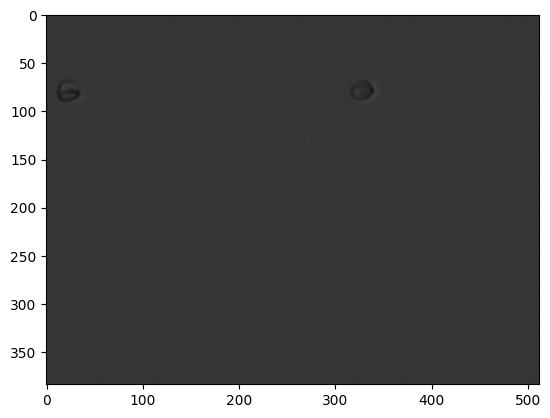

In [43]:
# Open the HDF5 file
DATA_FOLDER = Path("/home/fidelinus/tum/applied_machine_intelligence/final_project/data")
filepath = DATA_FOLDER / "sample01.pre"
file = h5py.File(filepath, 'r')

# Access the dataset
# List dataset in the file
amplitude = file['amplitude/images']
phase = file['phase/images']


# Picking one image
img = preprocess_sam(amplitude[0])
plt.imshow(img)
plt.show()

In [70]:
# Loading model
predictor = SamPredictor(sam)
predictor.set_image(img)

In [67]:
def draw_bbox(img, bbox):
    x1, y1, w, h = bbox
    img_with_rect = cv2.rectangle(img.copy(),(x1,y1),(x1+w,y1+h),(0,255,0),1)
    return img_with_rect

In [80]:
predictor.predict()

(array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True, False],
         [False, False,  True, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False,  True,  True, ...,  True, False, False],
         ...,
         [ True,  True,  True, ...,  True, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, 

In [78]:
plt.imshow(draw_bbox(img, mask[2]['bbox']))
plt.show()

ValueError: too many values to unpack (expected 4)